In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Importando e limpando dados
Começamos importando os dois arquivos csv e consolidando-os em um único dataframe. Para manter a organização, criamos uma coluna que identifica o ano e o mês da despesa.

In [4]:
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

despesas2019 = pd.read_csv('despesas-2019-via-API.csv', 
                            parse_dates=['data'],
                            date_parser=custom_date_parser)
despesas2020 = pd.read_csv('despesas-2020-via-API.csv', 
                            parse_dates=['data'],
                            date_parser=custom_date_parser)

despesas_full = pd.concat([despesas2019, despesas2020])

despesas_full['ano'] = pd.DatetimeIndex(despesas_full['data']).year
despesas_full['mes'] = pd.DatetimeIndex(despesas_full['data']).month
despesas_full.head()

,data,documento,documentoResumido,observacao,funcao,subfuncao,programa,acao,subtitulo,localizadorGasto,fase,especie,favorecido,codigoFavorecido,nomeFavorecido,ufFavorecido,valor,ug,uo,orgao,orgaoSuperior,categoria,grupo,elemento,modalidade,numeroProcesso,autor,ano,mes
0,2019-01-02,154040152572019OB800084,2019OB800084,APROPRIACAO DA FOLHA DE PAGAMENTO DO SERVIDOR ...,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,212B0053 - BENEFICIOS OBRIGATORIOS AOS SERVIDO...,0053 - NO DISTRITO FEDERAL,Pagamento,Original,02.038.232/0001-64 - BANCO COOPERATIVO DO BRAS...,02.038.232/0001-64,BANCO COOPERATIVO DO BRASIL S/A,DF,"58.096,72",FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,FUNDACAO UNIVERSIDADE DE BRASILIA,Fundação Universidade de Brasília,Ministério da Educação,3 - DESPESAS CORRENTES,3 - Outras Despesas Correntes,46 - Auxílio-Alimentação,90 - Reserva de Contingência,23106.151630/2018-04,Sem Informação,2019,1
1,2019-01-02,154040152572019OB800083,2019OB800083,APROPRIACAO DA FOLHA DE PAGAMENTO DO SERVIDOR ...,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,212B0053 - BENEFICIOS OBRIGATORIOS AOS SERVIDO...,0053 - NO DISTRITO FEDERAL,Pagamento,Original,02.038.232/0001-64 - BANCO COOPERATIVO DO BRAS...,02.038.232/0001-64,BANCO COOPERATIVO DO BRASIL S/A,DF,"58.096,72",FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,FUNDACAO UNIVERSIDADE DE BRASILIA,Fundação Universidade de Brasília,Ministério da Educação,3 - DESPESAS CORRENTES,3 - Outras Despesas Correntes,46 - Auxílio-Alimentação,90 - Reserva de Contingência,23106.151630/2018-04,Sem Informação,2019,1
2,2019-01-02,154040152572019OB800082,2019OB800082,APROPRIACAO DA FOLHA DE PAGAMENTO DO SERVIDOR ...,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,212B0053 - BENEFICIOS OBRIGATORIOS AOS SERVIDO...,0053 - NO DISTRITO FEDERAL,Pagamento,Original,02.038.232/0001-64 - BANCO COOPERATIVO DO BRAS...,02.038.232/0001-64,BANCO COOPERATIVO DO BRASIL S/A,DF,"58.096,72",FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,FUNDACAO UNIVERSIDADE DE BRASILIA,Fundação Universidade de Brasília,Ministério da Educação,3 - DESPESAS CORRENTES,3 - Outras Despesas Correntes,46 - Auxílio-Alimentação,90 - Reserva de Contingência,23106.151630/2018-04,Sem Informação,2019,1
3,2019-01-02,154040152572019OB800081,2019OB800081,10 - CANCELAMENTO PARCIAL DA 2018OB818347 - 20...,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Pagamento,Estorno / Cancelamento,***.534.141-** - ERICK FREDERICO XAVIER DE BRI...,***.534.141-**,ERICK FREDERICO XAVIER DE BRITO VANDERLEY,GO,"- 485,00",FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,Sem informação,Fundação Universidade de Brasília,Ministério da Educação,S - Sem informação,S - Sem informação,Sem informação,Sem informação,-8,Sem Informação,2019,1
4,2019-01-02,154040152572019OB800080,2019OB800080,10 - CANCELAMENTO PARCIAL DA 2018OB818263 - 20...,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Pagamento,Estorno / Cancelamento,***.271.551-** - RAMON MOREIRA GONCALVES,***.271.551-**,RAMON MOREIRA GONCALVES,GO,"- 465,00",FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,Sem informação,Fundação Universidade de Brasília,Ministério da Educação,S - Sem informação,S - Sem informação,Sem informação,Sem informação,-8,Sem Informação,2019,1


Na etapa de limpeza, vamos excluir as colunas que têm valores constantes e formatar a coluna de 'valor' em números tipo float.

In [5]:
def limpar_tabela(input_df):
    df = input_df.copy()

    # Identificando e excluindo colunas de valor constante:
    colunas_constantes = df.columns[df.nunique() <= 1]
    print('As colunas constantes, que estão sendo eliminadas do dataframe, são: '
           + str(list(colunas_constantes)))
    df.drop(list(colunas_constantes), inplace=True, axis=1)

    # Formatando a coluna de valor:
    df['valor'] = [x.replace('.', '') for x in df['valor']]
    df['valor'] = [x.replace(' ', '') for x in df['valor']]
    df['valor'] = [x.replace(',', '.') for x in df['valor']]
    df['valor'] = df['valor'].astype(float)
    df.valor = df.valor.round(2)

    return df

In [6]:
despesas = limpar_tabela(despesas_full)
despesas.head(3)

As colunas constantes, que estão sendo eliminadas do dataframe, são: ['fase', 'ug', 'orgao', 'orgaoSuperior', 'autor']


,data,documento,documentoResumido,observacao,funcao,subfuncao,programa,acao,subtitulo,localizadorGasto,especie,favorecido,codigoFavorecido,nomeFavorecido,ufFavorecido,valor,uo,categoria,grupo,elemento,modalidade,numeroProcesso,ano,mes
0,2019-01-02,154040152572019OB800084,2019OB800084,APROPRIACAO DA FOLHA DE PAGAMENTO DO SERVIDOR ...,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,212B0053 - BENEFICIOS OBRIGATORIOS AOS SERVIDO...,0053 - NO DISTRITO FEDERAL,Original,02.038.232/0001-64 - BANCO COOPERATIVO DO BRAS...,02.038.232/0001-64,BANCO COOPERATIVO DO BRASIL S/A,DF,58096.72,FUNDACAO UNIVERSIDADE DE BRASILIA,3 - DESPESAS CORRENTES,3 - Outras Despesas Correntes,46 - Auxílio-Alimentação,90 - Reserva de Contingência,23106.151630/2018-04,2019,1
1,2019-01-02,154040152572019OB800083,2019OB800083,APROPRIACAO DA FOLHA DE PAGAMENTO DO SERVIDOR ...,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,212B0053 - BENEFICIOS OBRIGATORIOS AOS SERVIDO...,0053 - NO DISTRITO FEDERAL,Original,02.038.232/0001-64 - BANCO COOPERATIVO DO BRAS...,02.038.232/0001-64,BANCO COOPERATIVO DO BRASIL S/A,DF,58096.72,FUNDACAO UNIVERSIDADE DE BRASILIA,3 - DESPESAS CORRENTES,3 - Outras Despesas Correntes,46 - Auxílio-Alimentação,90 - Reserva de Contingência,23106.151630/2018-04,2019,1
2,2019-01-02,154040152572019OB800082,2019OB800082,APROPRIACAO DA FOLHA DE PAGAMENTO DO SERVIDOR ...,12 - Educação,331 - Proteção e benefícios ao trabalhador,2109 - PROGRAMA DE GESTAO E MANUTENCAO DO MINI...,212B - BENEFICIOS OBRIGATORIOS AOS SERVIDORES ...,212B0053 - BENEFICIOS OBRIGATORIOS AOS SERVIDO...,0053 - NO DISTRITO FEDERAL,Original,02.038.232/0001-64 - BANCO COOPERATIVO DO BRAS...,02.038.232/0001-64,BANCO COOPERATIVO DO BRASIL S/A,DF,58096.72,FUNDACAO UNIVERSIDADE DE BRASILIA,3 - DESPESAS CORRENTES,3 - Outras Despesas Correntes,46 - Auxílio-Alimentação,90 - Reserva de Contingência,23106.151630/2018-04,2019,1


Podemos perceber que há despesas de espécie 'Original' e despesas que são 'Estorno/Cancelamento'. Vamos ver quanto esses valores estornados representam nos dados originais.

In [7]:
despesas_estornadas = despesas.loc[despesas['especie']=='Estorno / Cancelamento']
despesas_originais = despesas.loc[despesas['especie']=='Original']

print("Em 2019, as despesas estornadas somaram R$ "
      + str(-despesas_estornadas.loc[despesas_estornadas['ano']==2019]\
                                     .valor.sum().round(2))
      + ", o que representa "
      + str(round(-100*despesas_estornadas.loc\
          [despesas_estornadas['ano']==2019].valor.sum()\
           /despesas_originais.loc[despesas_originais['ano']==2019].valor.sum(), 3))
      + "% das despesas originais no ano.")

print("Em 2020, as despesas estornadas somaram R$ "
      + str(-despesas_estornadas.loc[despesas_estornadas['ano']==2020]\
                                     .valor.sum().round(2))
      + ", o que representa "
      + str(round(-100*despesas_estornadas.loc\
          [despesas_estornadas['ano']==2020].valor.sum()\
           /despesas_originais.loc[despesas_originais['ano']==2020].valor.sum(), 3))
      + "% das despesas originais no ano.")

Em 2019, as despesas estornadas somaram R$ 702853.32, o que representa 0.304% das despesas originais no ano.
Em 2020, as despesas estornadas somaram R$ 664850.68, o que representa 0.19% das despesas originais no ano.


Como as despesas estornadas representam valores irrisórios, vamos considerar apenas as despesas originais na nossa análise.

In [8]:
despesas_originais = despesas_originais.drop(columns=['especie'])

# 2. Análise dos dados
## 2.1 Evolução das despesas por grupo

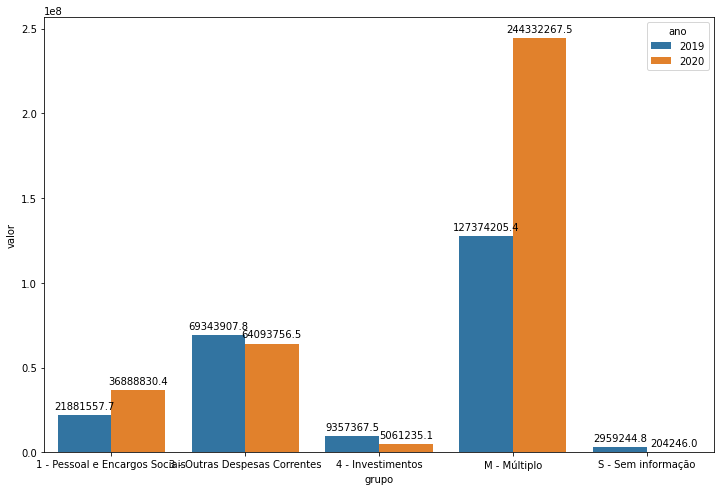

In [9]:
df_grp = despesas_originais.groupby(['grupo', 'ano'])['valor'].sum().reset_index()

plt.figure(figsize=(12,8))
ax = sns.barplot(x="grupo", y="valor", hue="ano", data=df_grp, ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

Vamos explorar os dados do grupo '1 - Pessoal e Encargos Sociais'

In [10]:
despesas_pessoal = despesas_originais.loc[despesas_originais['grupo']=='1 - Pessoal e Encargos Sociais']
despesas_pessoal.acao.unique()

array(['20TP - ATIVOS CIVIS DA UNIAO',
       '09HB - CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FUNDACOES PARA O CUSTEIO DO REGIME DE PREVIDENCIA DOS SERVIDORES PUBLICOS FEDERAIS',
       '0181 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO'], dtype=object)

Vamos ver quais as ações relacionadas aos gastos do grupo 'Múltiplo':

In [11]:
despesas_multiplo = despesas_originais.loc[despesas_originais['grupo']=='M - Múltiplo']
despesas_multiplo.acao.unique()

array(['-14 - Múltiplo',
       '20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSINO SUPERIOR',
       '4002 - ASSISTENCIA AO ESTUDANTE DE ENSINO SUPERIOR',
       '00OQ - CONTRIBUICOES A ORGANISMOS INTERNACIONAIS SEM EXIGENCIA DE PROGRAMACAO ESPECIFICA',
       '20YA - PREPARACAO DE ATLETAS E CAPACITACAO DE RECURSOS HUMANOS PARA O ESPORTE DE ALTO RENDIMENTO',
       '0181 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO',
       '20GK - FOMENTO AS ACOES DE GRADUACAO, POS-GRADUACAO, ENSINO, PESQUISA E EXTENSAO',
       '0487 - CONCESSAO DE BOLSAS DE ESTUDO NO ENSINO SUPERIOR',
       '4572 - CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM PROCESSO DE QUALIFICACAO E REQUALIFICACAO',
       '20TP - ATIVOS CIVIS DA UNIAO',
       '8282 - REESTRUTURACAO E MODERNIZACAO DAS INSTITUICOES FEDERAIS DE ENSINO SUPERIOR',
       '21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA DE IMPORTANCIA INTERNACIONAL DECORRENTE DO CORONAVIRUS',
       '14T6 - IMPLANTACAO DO PROGRAMA ESTRATEGICO DE PROTECAO DA

As despesas do grupo 'M - Múltiplo' que forem referentes a gastos com servidores, vamos reclassificar como '1 - Pessoal e Encargos Sociais'

In [12]:
despesas_mod = despesas_originais.copy()

despesas_mod.loc[despesas_mod.acao=='20TP - ATIVOS CIVIS DA UNIAO', 'grupo'] = '1 - Pessoal e Encargos Sociais'
despesas_mod.loc[despesas_mod.acao=='09HB - CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FUNDACOES PARA O CUSTEIO DO REGIME DE PREVIDENCIA DOS SERVIDORES PUBLICOS FEDERAIS', 'grupo'] = '1 - Pessoal e Encargos Sociais'
despesas_mod.loc[despesas_mod.acao=='0181 - APOSENTADORIAS E PENSOES CIVIS DA UNIAO', 'grupo'] = '1 - Pessoal e Encargos Sociais'

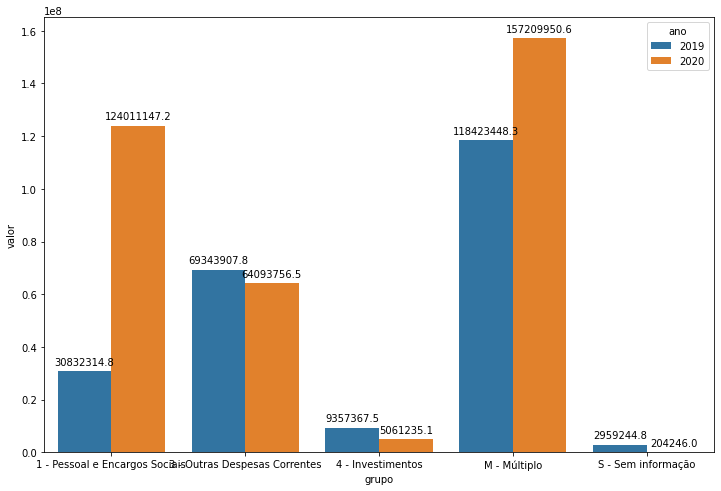

In [13]:
df_grp = despesas_mod.groupby(['grupo', 'ano'])['valor'].sum().reset_index()

plt.figure(figsize=(12,8))
ax = sns.barplot(x="grupo", y="valor", hue="ano", data=df_grp, ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')

In [14]:
despesas_multiplo = despesas_mod.loc[despesas_mod['grupo']=='M - Múltiplo']
despesas_multiplo.acao.unique()

array(['-14 - Múltiplo',
       '20RK - FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSINO SUPERIOR',
       '4002 - ASSISTENCIA AO ESTUDANTE DE ENSINO SUPERIOR',
       '00OQ - CONTRIBUICOES A ORGANISMOS INTERNACIONAIS SEM EXIGENCIA DE PROGRAMACAO ESPECIFICA',
       '20YA - PREPARACAO DE ATLETAS E CAPACITACAO DE RECURSOS HUMANOS PARA O ESPORTE DE ALTO RENDIMENTO',
       '20GK - FOMENTO AS ACOES DE GRADUACAO, POS-GRADUACAO, ENSINO, PESQUISA E EXTENSAO',
       '0487 - CONCESSAO DE BOLSAS DE ESTUDO NO ENSINO SUPERIOR',
       '4572 - CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM PROCESSO DE QUALIFICACAO E REQUALIFICACAO',
       '8282 - REESTRUTURACAO E MODERNIZACAO DAS INSTITUICOES FEDERAIS DE ENSINO SUPERIOR',
       '21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA DE IMPORTANCIA INTERNACIONAL DECORRENTE DO CORONAVIRUS',
       '14T6 - IMPLANTACAO DO PROGRAMA ESTRATEGICO DE PROTECAO DA SOCIEDADE (PROTEGER)'],
      dtype=object)